# LabPractice 4.2: Forecasting II

For this practice, you will need the following datasets:
- **ARMA_series.xlsx**: synthetic dataset with 6 timeseries to practice ARMA model training.

The main package for time series analysis in Python is **statsmodels**.

Further reading:
- [statsmodels](https://www.statsmodels.org/stable/index.html)

In addition, we will be using the following libraries:
- Data management
    - [numpy](https://numpy.org/)
    - [pandas](https://pandas.pydata.org/)

- Plotting
    - [seaborn](https://seaborn.pydata.org/)
    - [matplotlib](https://matplotlib.org/)

- Others
    - MLTools

In [1]:
# Checking the current Python version in the environment
import sys

sys.version


'3.12.0 (tags/v3.12.0:0fb18b0, Oct  2 2023, 13:03:39) [MSC v.1935 64 bit (AMD64)]'

In [2]:
# For more information, check https://www.machinelearningplus.com/time-series/time-series-analysis-python/ 
### Load libraries ###
# interactive plotting
#%matplotlib inline
#%config InlineBackend.figure_format = 'svg' # ‘png’, ‘retina’, ‘jpeg’, ‘svg’, ‘pdf’

# plotting libraries
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
sns.set()

#Define figure sizes
plt.rcParams.update({'figure.figsize': (8, 5), 'figure.dpi': 120})

# Data management libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from dateutil.parser import parse 

# Machine Learning libraries
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_predict

# Others
import math
from mltools import forecast_tools as FT

---
## 1. Read the dataset

In [4]:
# Import data
df = pd.read_csv('C:/Users/nicol/OneDrive/Documentos/VSCLocal/Data/datos/ARMA_series.csv',sep=";")
df.head()

,y1,y2,y3,y4,y5,y6
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.153085,-0.716578,-1.714427,0.000000,1.672241,-0.491550
2,-0.407418,-0.388769,0.065251,1.450110,-0.256682,1.600353
3,0.038315,0.393303,0.508671,1.845359,-0.099479,-0.524670
4,-0.055686,-1.399870,-0.237498,4.164812,-1.090444,0.319794


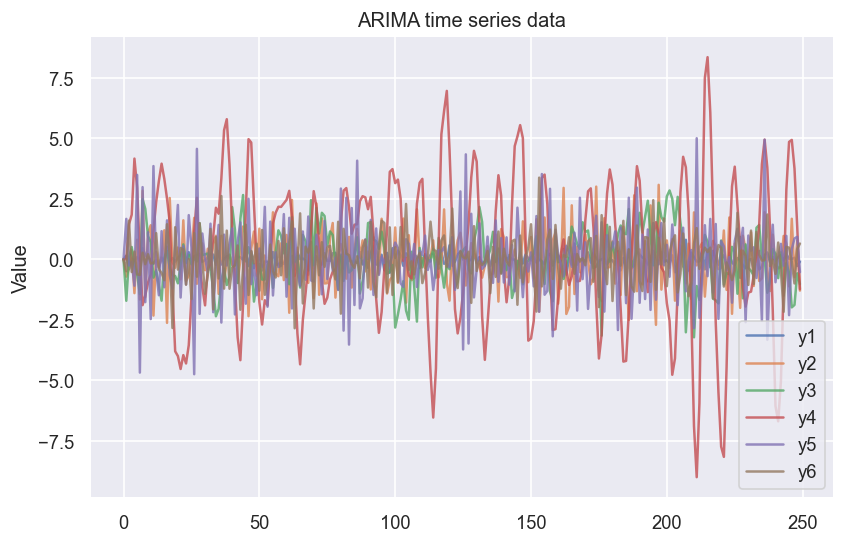

In [5]:
# Plotting a time series
fig, ax = plt.subplots()
for col in df.columns.values.tolist():
    ax.plot(col, data=df, label=col, alpha=0.8)
ax.set(title='ARIMA time series data', ylabel='Value')
plt.legend()
plt.show()

In [6]:
df_ts = df[['y1']] # Maintain data.frame format for column
df_ts

,y1
0,0.000000
1,0.153085
2,-0.407418
3,0.038315
4,-0.055686
...,...
245,0.020973
246,0.022484
247,0.058784
248,-0.275104


<Axes: >

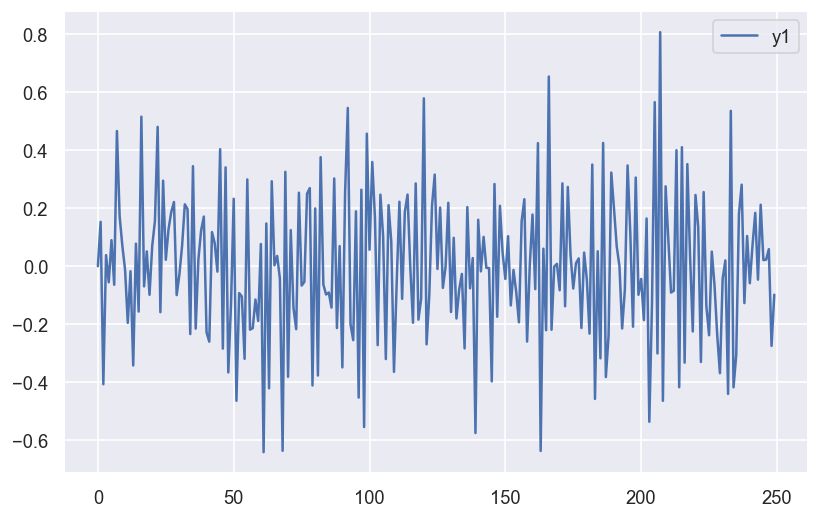

In [7]:
# Plotting a time series
sns.lineplot(data=df_ts)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


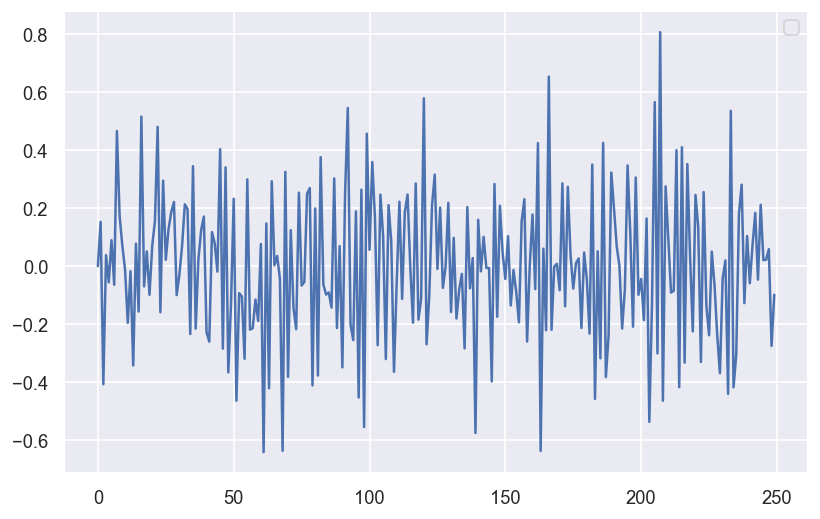

In [8]:
# Plotting a time series
plt.figure()
plt.plot(df_ts)
ax.set(title='ARIMA time series data', ylabel='Value')
plt.legend()
plt.show()

---
### Identification process

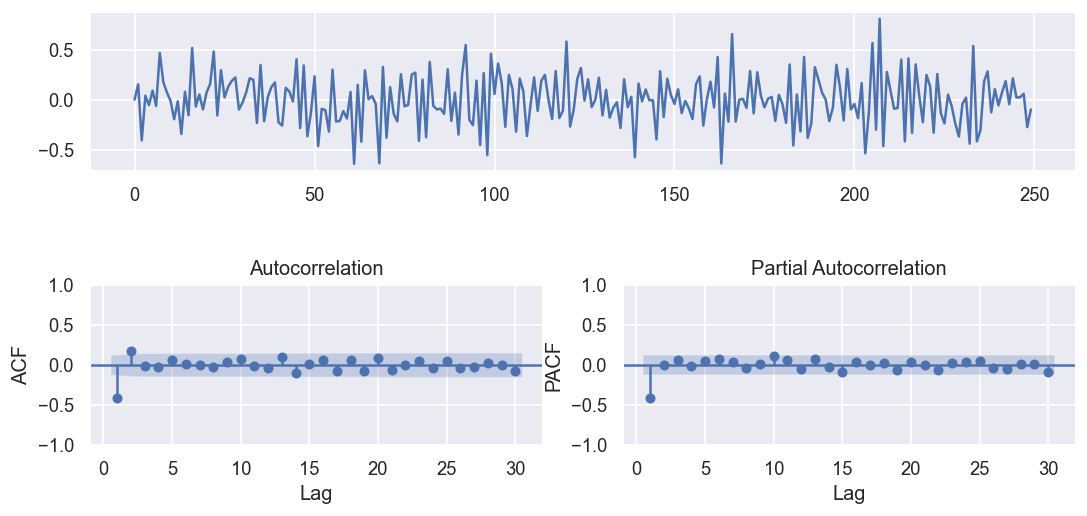

In [9]:
# ACF and PACF of the time series -> identify significant lags and order
FT.ts_display(df_ts, lags=30)

In [10]:
df_ts.head(2)

,y1
0,0.000000
1,0.153085


<Figure size 1440x600 with 0 Axes>

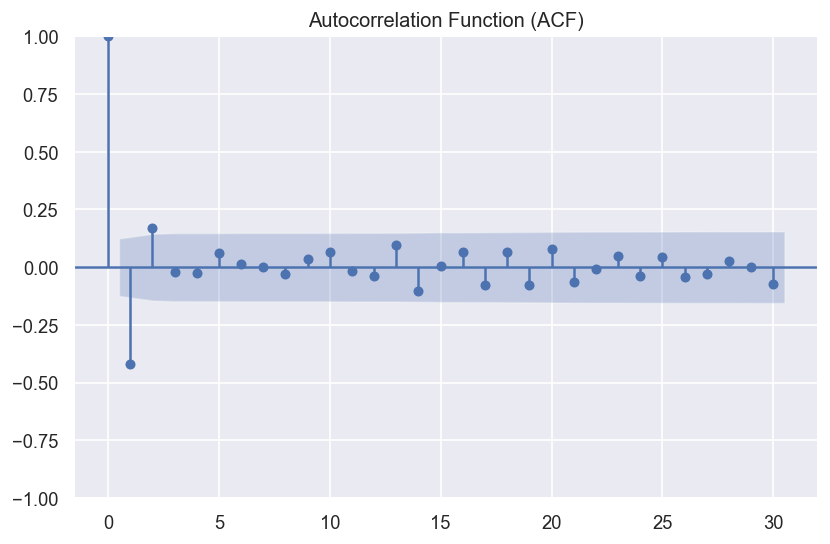

<Figure size 1440x600 with 0 Axes>

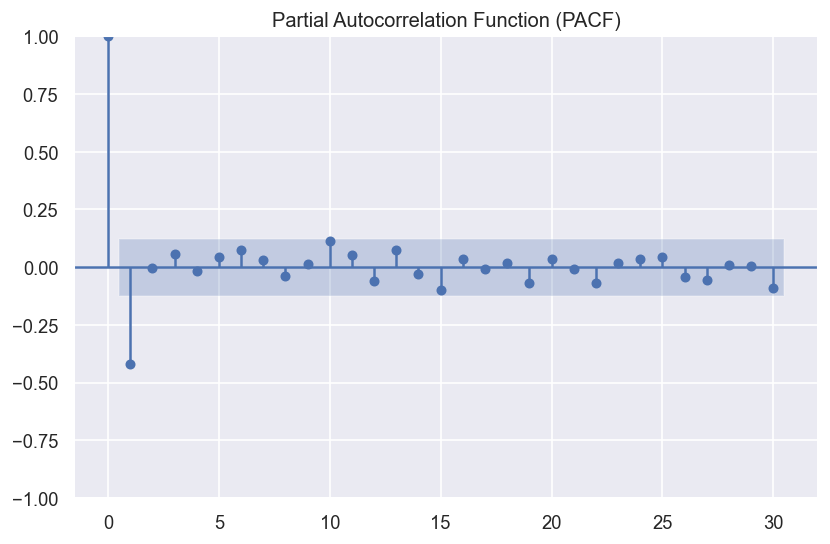

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Suponiendo que df_ts es tu DataFrame y tiene una columna 'value' que quieres analizar
# df_ts = pd.read_csv('tu_archivo.csv')  # Carga tu serie temporal aquí si es necesario

# Graficar ACF
plt.figure(figsize=(12, 5))
plot_acf(df_ts['y1'], lags=30, alpha=0.05)  # Ajusta 'value' al nombre de tu columna
plt.title('Autocorrelation Function (ACF)')
plt.show()

# Graficar PACF
plt.figure(figsize=(12, 5))
plot_pacf(df_ts['y1'], lags=30, alpha=0.05, method='ywm')  # Ajusta 'value' al nombre de tu columna
plt.title('Partial Autocorrelation Function (PACF)')
plt.show()


---
### ARMA model

In [12]:
# Fit model with estimated order
arima_fit = ARIMA(df_ts, order=(1,0,0), trend="c").fit() #order=(p,d,q)
print(arima_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                     y1   No. Observations:                  250
Model:                 ARIMA(1, 0, 0)   Log Likelihood                   9.991
Date:                Mon, 15 Apr 2024   AIC                            -13.983
Time:                        20:03:55   BIC                             -3.418
Sample:                             0   HQIC                            -9.731
                                - 250                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0018      0.010     -0.176      0.860      -0.022       0.019
ar.L1         -0.4173      0.062     -6.736      0.000      -0.539      -0.296
sigma2         0.0540      0.005     11.334      0.0

#### Analyze model

Ljung-Box test of residuals:
      lb_stat  lb_pvalue
25  15.257565   0.935154


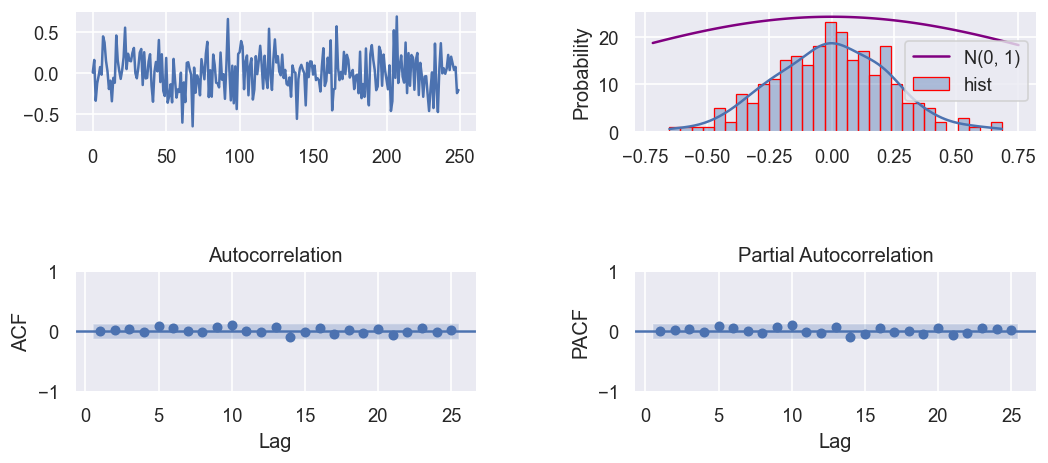

In [13]:
# Plot residual error
FT.check_residuals(pd.DataFrame(arima_fit.resid))

c:\Users\nicol\OneDrive\Documentos\VSCLocal\nicolas-env\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['plot_insample']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


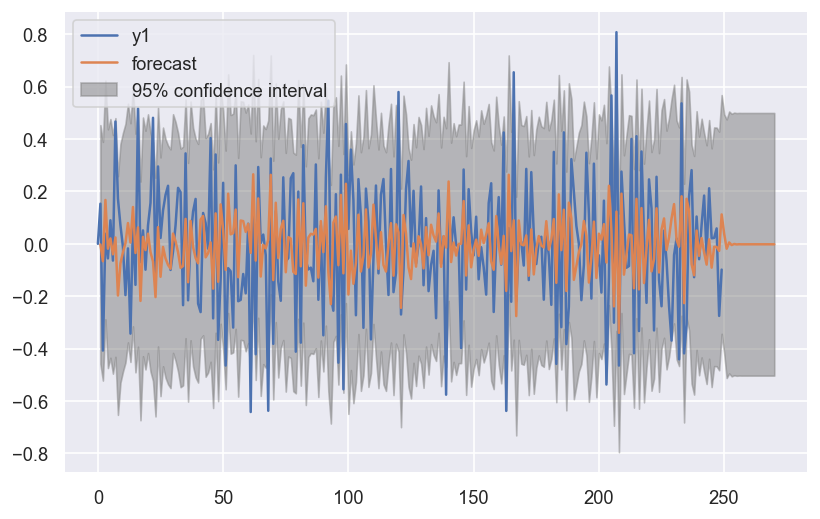

In [14]:
# Predict past and future values
horizon = 20
fig, ax = plt.subplots()
ax = df_ts.loc[0:].plot(ax=ax)
fig = plot_predict(arima_fit, 1, df_ts.shape[0] + horizon, 
                    dynamic=False, ax=ax,
                    plot_insample=False)
plt.show()